In [1]:
# import useful library and package
import pandas as pd
import tweepy as tw
import os
import json
import time

In [2]:
# import twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Gather Data

In [3]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
twitter_archive.shape

(2356, 17)

In [5]:
# import image-predictions.tsv
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.shape

(2075, 12)

In [8]:
tweet_ids = twitter_archive['tweet_id']

In [9]:
consumer_key = 'xxxxx'
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth,parser=tw.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [2]:
fail_id = {}
start = time.time()
with open ("tweet_json.txt", "w") as f:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json_obj = json.dumps(tweet)
            f.write(json_obj + '\n')
        except tw.TweepError as e:
            print("Fail, no tweet found for {}".format(str(tweet_id)))
            fail_id[tweet_id] = e
end = time.time()
print("time used: {}".format(end-start))
print("fail_id: {}".format(fail_id))

In [11]:
# read txt file to dataframe

tweet_list = []
with open ("tweet_json.txt", "r") as f:
    for line in f:
        json_data = json.loads(line)
        tweet_list.append({'tweet_id':json_data['id'],
                          'favorite_count':json_data['favorite_count'],
                          'retweet_count':json_data['retweet_count']})
tweet_att = pd.DataFrame(tweet_list,columns = ['tweet_id','favorite_count','retweet_count'])


In [12]:
tweet_att.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35818,7583
1,892177421306343426,30920,5622
2,891815181378084864,23258,3720
3,891689557279858688,39078,7764
4,891327558926688256,37340,8360


In [13]:
tweet_att.shape

(2331, 3)

### Assess

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [20]:
tweet_att.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35818,7583
1,892177421306343426,30920,5622
2,891815181378084864,23258,3720
3,891689557279858688,39078,7764
4,891327558926688256,37340,8360


#### Quality

##### `twitter_archive` table
- Erroneous datatype: **tweet_id**, **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** should change to string data type, **timestamp**, **retweeted_status_timestamp** should change to datetime data type 
- Big amount of missing records for **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp**, and small amount of missing records for **expanded_urls**.
- Rating denominator should always be 10
- Some of the name is "a","an" and "the"
- Rating denominator and rating numerator can be combined in one column called rating.
- Drop **source** and **expanded_urls** column since they are not useful for the analysis

##### `image_predictions` table
- **Tweet_id** is integer type, should be string type
- Drop **jpg_url** column


##### `tweet_att` table
- Erroneous datatype: **tweet_id** should be string data type.


#### Tidiness
##### `twitter_archive` table
- doggo, pupper, puppo and floofer can be combined into one column called dog_stage
- Combine rating_denominator and rating_numerator together
- Expanded_url sometimes has two urls in one record

##### `image_predictions` table

##### `tweet_att` table

### Clean

#### - Quality

#####   Data type 

In [21]:
# copy three datasets 
twitter_archive_clean = twitter_archive
image_pred_clean = image_predictions
tweet_att_clean = tweet_att

##### Define
Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp columns

In [22]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                          'retweeted_status_id', 'retweeted_status_user_id',
                          'retweeted_status_timestamp'],axis = 1)

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


##### Define

Erroneous data type in `twitter_archive` table: **tweet_id**, **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** should change to string data type, **timestamp**, **retweeted_status_timestamp** should change to datetime data type
`image_predictions` and `tweet_att` table: change tweet_id to string.

##### Code

In [24]:
# convert data type for twitter_archive_clean dataframe
twitter_archive_clean[['tweet_id']] = twitter_archive_clean[['tweet_id']].astype('str')
                             

In [25]:
twitter_archive_clean[['timestamp']] = twitter_archive_clean[['timestamp']].astype('datetime64')


In [26]:
# convert data type for image_pred_clean table
image_pred_clean[['tweet_id']] = image_pred_clean[['tweet_id']].astype('str')


In [27]:
# conver data type for tweet_att_clean table
tweet_att_clean[['tweet_id']] = tweet_att_clean[['tweet_id']].astype('str')

##### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


In [29]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
tweet_att_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Drop jpg_url column in `image_pred_clean` table
##### Define
Drop jpg_url column since we are not going to use it in our analysis
##### Code

In [31]:
image_pred_clean = image_pred_clean.drop(['jpg_url'],axis = 1)

##### Test

In [32]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


####  Rating denomitor
##### Define
Rating denomitor should always be 10
##### Code

In [33]:
# replace rating_denomitor to 10
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator != 10]=10

##### Test

In [34]:
twitter_archive_clean.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### Change the dog name for 'a','an','the' 
##### Define
Change the dog name from 'a','an','the' to 'None'
##### Code

In [35]:
twitter_archive_clean = twitter_archive_clean.replace(
    ['a','the','an'],['None','None','None'])


##### Test

In [36]:
twitter_archive_clean[twitter_archive_clean.name == 'a'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [37]:
twitter_archive_clean[twitter_archive_clean.name == 'the'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [38]:
twitter_archive_clean[twitter_archive_clean.name == 'an'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### Drop columns
##### Define
Drop **source** and ** expanded_urls** in `twitter_archive_clean` table
##### Code

In [39]:
# drop source and expanded_urls columns
twitter_archive_clean = twitter_archive_clean.drop(['source','expanded_urls'], axis = 1)

##### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(8)
memory usage: 184.1+ KB


#### Tidiness

##### Define
Combine rating_denominator and rating_numerator to one column rating
##### Code


In [41]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

In [42]:
# drop rating_denominator and rating_numerator
twitter_archive_clean = twitter_archive_clean.drop(['rating_denominator','rating_numerator'],axis = 1)


##### Test


In [43]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,1.2


#### Coding doggo, floofer, pupper and puppo columns
##### Define
Code doggo to 1, floofer to 2, pupper to 3 and puppo to 4, None to 0
##### Code

In [44]:
twitter_archive_clean.doggo.unique()

array(['None', 'doggo', 10], dtype=object)

In [45]:
twitter_archive_clean.floofer.unique()

array(['None', 'floofer', 10], dtype=object)

In [46]:
twitter_archive_clean.pupper.unique()

array(['None', 'pupper', 10], dtype=object)

In [47]:
twitter_archive_clean.puppo.unique()

array(['None', 'puppo', 10], dtype=object)

In [48]:
# one record is put 10 for all variables, let remove this record
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.puppo != 10]

In [49]:
# Test
twitter_archive_clean.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [50]:
twitter_archive_clean.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [51]:
twitter_archive_clean.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [52]:
twitter_archive_clean.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [53]:
# replace None to 0 for all four columns
twitter_archive_clean.replace({'doggo':'None','puppo':'None','floofer':'None','pupper':'None'}, 
                              0,inplace = True)


In [54]:
# coding 'doggo','floofer','pupper','puppo' to 1,2,3,4
twitter_archive_clean.replace(['doggo','floofer','pupper','puppo'],[1,2,3,4],inplace = True)

##### Test

In [55]:
# Check if these coding are mapping 
twitter_archive_clean.doggo.unique()

array([0, 1])

In [56]:
twitter_archive_clean.floofer.unique()

array([0, 2])

In [57]:
twitter_archive_clean.pupper.unique()

array([0, 3])

In [58]:
twitter_archive_clean.puppo.unique()

array([0, 4])

#### Combine 'doggo','floofer','pupper','puppo' four columns to one column
##### Define
Combine 'doggo','floofer','pupper','puppo' columns to one 'stage' column
##### Code

In [59]:
# create a new column 'stage', value is the sum of 'doggo','floofer','pupper','puppo'
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']


##### Test

In [60]:
twitter_archive_clean.describe() # max for stage should be 4 not 5

,doggo,floofer,pupper,puppo,rating,stage
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,0.041577,0.008573,0.330476,0.051436,1.223746,0.432062
std,0.199664,0.130687,0.939463,0.450761,4.102247,1.051521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000
max,1.000000,2.000000,3.000000,4.000000,177.600000,5.000000


In [61]:
# check which row has stage > 4
twitter_archive_clean[twitter_archive_clean['stage'] > 4] 

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating,stage
191,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,None,1,0,0,4,1.3,5


In [62]:
# after reading the text, it should be a doggo, let's change it to 1
twitter_archive_clean.replace({'stage':5},1,inplace = True)

In [63]:
# retest

twitter_archive_clean.describe()

,doggo,floofer,pupper,puppo,rating,stage
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,0.041577,0.008573,0.330476,0.051436,1.223746,0.430347
std,0.199664,0.130687,0.939463,0.450761,4.102247,1.047322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000
max,1.000000,2.000000,3.000000,4.000000,177.600000,4.000000


In [64]:
# drop doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1,inplace = True
                          )

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2333 non-null object
timestamp    2333 non-null datetime64[ns]
text         2333 non-null object
name         2333 non-null object
rating       2333 non-null float64
stage        2333 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 127.6+ KB


#### Merge three datasets to one
##### Define
Merge three datasets twitter_archive_clean, image_pred_clean and twitter_att_clean together on tweet_id
##### Code

In [66]:
tw_merge = twitter_archive_clean.merge(image_pred_clean, on = 'tweet_id', how = 'left')

In [67]:
twitter_archive_master = tw_merge.merge(tweet_att_clean, on = 'tweet_id', how ='left')

##### Test

In [68]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 18 columns):
tweet_id          2333 non-null object
timestamp         2333 non-null datetime64[ns]
text              2333 non-null object
name              2333 non-null object
rating            2333 non-null float64
stage             2333 non-null int64
img_num           2057 non-null float64
p1                2057 non-null object
p1_conf           2057 non-null float64
p1_dog            2057 non-null object
p2                2057 non-null object
p2_conf           2057 non-null float64
p2_dog            2057 non-null object
p3                2057 non-null object
p3_conf           2057 non-null float64
p3_dog            2057 non-null object
favorite_count    2309 non-null float64
retweet_count     2309 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(9)
memory usage: 346.3+ KB


In [69]:
twitter_archive_master.head()

,tweet_id,timestamp,text,name,rating,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,0,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35818.0,7583.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,0,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30920.0,5622.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,0,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23258.0,3720.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,1.3,0,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39078.0,7764.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,1.2,0,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37340.0,8360.0


#### Export to csv file

In [70]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Analysis

#### 1. Is there relationship between rating and stage?

In [71]:
twitter_archive_master.groupby(['stage'])['rating'].mean()

stage
0    1.243625
1    1.189286
2    1.188889
3    1.085366
4    1.185366
Name: rating, dtype: float64

Only stage 3 pupper has lower rating than the other three, stage doggo, floofer and puppo has similar rating around 1.19.

#### 2. What is the average confidence level for different type of p1_dog separately?

In [72]:
twitter_archive_master.groupby(['p1_dog'])['p1_conf'].mean()

p1_dog
False    0.540495
True     0.613413
Name: p1_conf, dtype: float64

#### 3. What is the average confidence level for different type of p2_dog separately?

In [73]:
twitter_archive_master.groupby(['p2_dog'])['p2_conf'].mean()

p2_dog
False    0.117380
True     0.140849
Name: p2_conf, dtype: float64

#### 4. What is the average confidence level for different type of p3_dog separately?

In [74]:
twitter_archive_master.groupby(['p3_dog'])['p3_conf'].mean()

p3_dog
False    0.056712
True     0.061642
Name: p3_conf, dtype: float64

The confidence level for p1 is much higher than p2 and p3 prediction. For each prediction, the confidence level for True is higher than False.

### Visualization
#### Does favorite_count have relationship with retweet_count?

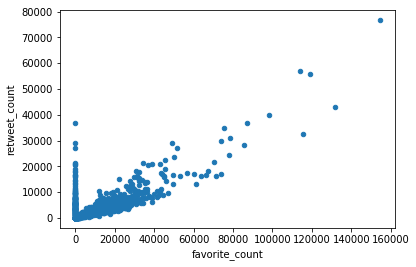

In [77]:
twitter_archive_master.plot.scatter(x = 'favorite_count', y = 'retweet_count');

Favorite_count has positive relationship with retweet_count.